In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

Today we are going to look at a Cats vs Dogs classifier and see how well it would perform for an Indian vs Chinese classifier.

Here is the reference blog: https://towardsdatascience.com/classifying-cats-vs-dogs-a-beginners-guide-to-deep-learning-4469ffed086c

None of the GPUs in Paperspace were operational, so we're going to try to execute in Google Colab instead.

In [1]:
!pip install -q jmd_imagescraper

In [2]:

!pip install -Uqq fastbook

import fastbook  #import the fast.ai library
from fastbook import *  #dont't worry, it's designed to work with import *
fastbook.setup_book()
from fastai.vision.widgets import *

#import the image scraper by @JoeDockrill, website: https://joedockrill.github.io/blog/2020/09/18/jmd-imagescraper-library/
from jmd_imagescraper.core import * 
from pathlib import Path
from jmd_imagescraper.imagecleaner import *


     |████████████████████████████████| 719 kB 5.2 MB/s 
     |████████████████████████████████| 362 kB 49.0 MB/s 
     |████████████████████████████████| 4.4 MB 47.7 MB/s 
     |████████████████████████████████| 1.2 MB 43.7 MB/s 
     |████████████████████████████████| 1.1 MB 26.6 MB/s 
     |████████████████████████████████| 212 kB 43.7 MB/s 
     |████████████████████████████████| 101 kB 11.7 MB/s 
     |████████████████████████████████| 140 kB 45.5 MB/s 
     |████████████████████████████████| 596 kB 48.7 MB/s 
     |████████████████████████████████| 127 kB 48.5 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 144 kB 50.7 MB/s 
     |████████████████████████████████| 271 kB 53.3 MB/s 
     |████████████████████████████████| 6.6 MB 31.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10

In [3]:
animals=['cat','dog']
path = Path().cwd()/"animals"#assigns path to current working directory

In [4]:
duckduckgo_search(path,"cat","cats",max_results=100) #downloads 100 images of 'cats' and saves it in path/cat


Duckduckgo search: cats


[Path('/content/animals/cat/001_27ce8b51.jpg'),
 Path('/content/animals/cat/002_a32c7a29.jpg'),
 Path('/content/animals/cat/003_3484a82e.jpg'),
 Path('/content/animals/cat/004_5acfad3d.jpg'),
 Path('/content/animals/cat/005_140d7d7f.jpg'),
 Path('/content/animals/cat/006_57c96bb0.jpg'),
 Path('/content/animals/cat/007_5c53cdde.jpg'),
 Path('/content/animals/cat/008_0cb041e1.jpg'),
 Path('/content/animals/cat/009_27304d80.jpg'),
 Path('/content/animals/cat/010_69c52c08.jpg'),
 Path('/content/animals/cat/011_5468b8c9.jpg'),
 Path('/content/animals/cat/012_b6887511.jpg'),
 Path('/content/animals/cat/013_a0f0ef55.jpg'),
 Path('/content/animals/cat/014_ac6d0387.jpg'),
 Path('/content/animals/cat/015_4525f6af.jpg'),
 Path('/content/animals/cat/016_6d17b2bc.jpg'),
 Path('/content/animals/cat/017_0b9f152b.jpg'),
 Path('/content/animals/cat/018_4fd7c365.jpg'),
 Path('/content/animals/cat/019_e85fbef1.jpg'),
 Path('/content/animals/cat/020_8e4560f1.jpg'),
 Path('/content/animals/cat/021_820d9b73

In [5]:
duckduckgo_search(path,"dog","dogs",max_results=100)#downloads 100 images of 'dogs' and saves it in path/dog


Duckduckgo search: dogs


[Path('/content/animals/dog/001_60b12e9e.jpg'),
 Path('/content/animals/dog/002_8337030c.jpg'),
 Path('/content/animals/dog/003_fa295c70.jpg'),
 Path('/content/animals/dog/004_7afa9888.jpg'),
 Path('/content/animals/dog/005_0b530b23.jpg'),
 Path('/content/animals/dog/006_1e6f06c5.jpg'),
 Path('/content/animals/dog/007_6a9a7834.jpg'),
 Path('/content/animals/dog/008_d568ae8a.jpg'),
 Path('/content/animals/dog/009_9833890e.jpg'),
 Path('/content/animals/dog/010_0ff75479.jpg'),
 Path('/content/animals/dog/011_04880aa9.jpg'),
 Path('/content/animals/dog/012_88dbe677.jpg'),
 Path('/content/animals/dog/013_9165c39e.jpg'),
 Path('/content/animals/dog/014_897ac34c.jpg'),
 Path('/content/animals/dog/015_97a2999e.jpg'),
 Path('/content/animals/dog/016_4bca4787.jpg'),
 Path('/content/animals/dog/017_6beb5b36.jpg'),
 Path('/content/animals/dog/018_1f0b2149.jpg'),
 Path('/content/animals/dog/019_ce91902a.jpg'),
 Path('/content/animals/dog/020_c2c0aeea.jpg'),
 Path('/content/animals/dog/021_7f6e8fb6

In [6]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [7]:
fns=get_image_files(path)
fns

(#200) [Path('/content/animals/dog/099_da948d87.jpg'),Path('/content/animals/dog/087_acf5d2fe.jpg'),Path('/content/animals/dog/002_8337030c.jpg'),Path('/content/animals/dog/039_34e8c438.jpg'),Path('/content/animals/dog/098_ce4d697b.jpg'),Path('/content/animals/dog/053_9b8055dc.jpg'),Path('/content/animals/dog/068_79af90a2.jpg'),Path('/content/animals/dog/035_fe16cd97.jpg'),Path('/content/animals/dog/069_cb714a03.jpg'),Path('/content/animals/dog/081_75a791ee.jpg')...]

In [8]:
failed=verify_images(fns)#looks for files that arent images
failed

(#0) []

In [9]:

failed.map(Path.unlink);#unlinks the failed files from the folder


In [10]:
animals=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),#splits the dataset into a training set and validation set
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [11]:
dls=animals.dataloaders(path)

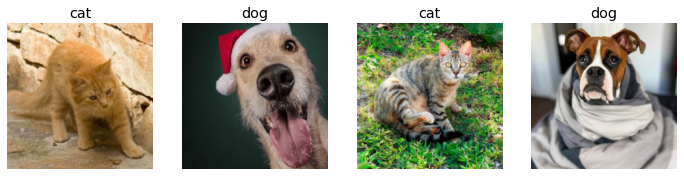

In [12]:

dls.valid.show_batch(max_n=4,nrows=1)

In [13]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)#training our model
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.324291,1.545861,0.375000,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.618167,0.647017,0.250000,00:41
1,0.423521,0.105873,0.050000,00:42
2,0.330758,0.047476,0.025000,00:46
3,0.266250,0.036449,0.025000,00:39


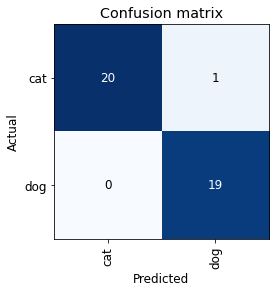

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()#plots a confusion matrix

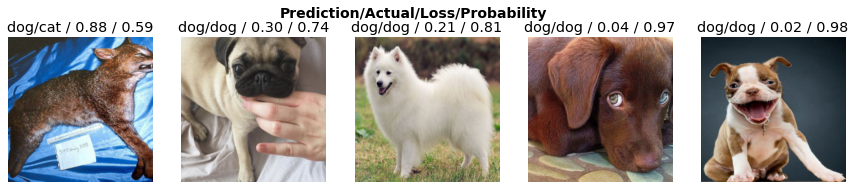

In [15]:

interp.plot_top_losses(5, nrows=1)


In [16]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')

btn_upload = widgets.FileUpload()#Displays a widget which can be used to upload images from your system
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:

img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))#resizes the uloaded image
out_pl


In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)#asks the model to predict the animal in the image!
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'#displays the output in a readable format
lbl_pred 